Convolutional Dictionary Learning
=================================

This example demonstrates the use of [prlcnscdl.ConvBPDNDictLearn_Consensus](http://sporco.rtfd.org/en/latest/modules/sporco.dictlrn.prlcnscdl.html#sporco.dictlrn.prlcnscdl.ConvBPDNDictLearn_Consensus) for learning a convolutional dictionary from a set of training images. The dictionary learning algorithm is based on the ADMM consensus dictionary update [[1]](http://sporco.rtfd.org/en/latest/zreferences.html#sorel-2016-fast) [[25]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2018-convolutional1).

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.dictlrn import prlcnscdl
from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])
S = np.dstack((S1, S2, S3, S4, S5))

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = signal.tikhonov_filter(S, fltlmbd, npd)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(8, 8, 64)

Set regularization parameter and options for dictionary learning solver.

In [5]:
lmbda = 0.2
opt = prlcnscdl.ConvBPDNDictLearn_Consensus.Options({'Verbose': True,
                        'MaxMainIter': 200,
                        'CBPDN': {'rho': 50.0*lmbda + 0.5},
                        'CCMOD': {'rho': 1.0, 'ZeroMean': True}})

Create solver object and solve.

In [6]:
d = prlcnscdl.ConvBPDNDictLearn_Consensus(D0, sh, lmbda, opt)
D1 = d.solve()
print("ConvBPDNDictLearn_Consensus solve time: %.2fs" %
      d.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1   
----------------------------------


   0  4.18e+02  4.18e+02  1.97e-01
   1  4.01e+02  3.92e+02  4.45e+01


   2  3.50e+02  3.00e+02  2.48e+02
   3  3.23e+02  2.10e+02  5.66e+02


   4  3.13e+02  1.53e+02  7.99e+02
   5  3.03e+02  1.22e+02  9.04e+02


   6  2.91e+02  1.10e+02  9.03e+02
   7  2.79e+02  1.09e+02  8.53e+02


   8  2.71e+02  1.11e+02  8.00e+02
   9  2.66e+02  1.13e+02  7.62e+02


  10  2.62e+02  1.14e+02  7.43e+02
  11  2.60e+02  1.13e+02  7.35e+02


  12  2.58e+02  1.11e+02  7.34e+02
  13  2.56e+02  1.09e+02  7.35e+02


  14  2.55e+02  1.07e+02  7.37e+02
  15  2.53e+02  1.06e+02  7.38e+02


  16  2.52e+02  1.05e+02  7.38e+02
  17  2.51e+02  1.04e+02  7.37e+02


  18  2.50e+02  1.03e+02  7.35e+02
  19  2.50e+02  1.03e+02  7.33e+02


  20  2.49e+02  1.03e+02  7.31e+02
  21  2.48e+02  1.03e+02  7.28e+02


  22  2.48e+02  1.02e+02  7.26e+02
  23  2.47e+02  1.02e+02  7.25e+02


  24  2.47e+02  1.02e+02  7.24e+02
  25  2.46e+02  1.02e+02  7.23e+02


  26  2.46e+02  1.01e+02  7.22e+02
  27  2.45e+02  1.01e+02  7.21e+02


  28  2.45e+02  1.01e+02  7.21e+02
  29  2.45e+02  1.01e+02  7.20e+02


  30  2.44e+02  1.00e+02  7.20e+02
  31  2.44e+02  1.00e+02  7.19e+02


  32  2.44e+02  1.00e+02  7.18e+02
  33  2.43e+02  1.00e+02  7.17e+02


  34  2.43e+02  9.98e+01  7.17e+02
  35  2.43e+02  9.97e+01  7.16e+02


  36  2.43e+02  9.96e+01  7.15e+02
  37  2.42e+02  9.94e+01  7.15e+02


  38  2.42e+02  9.93e+01  7.14e+02
  39  2.42e+02  9.91e+01  7.14e+02


  40  2.42e+02  9.90e+01  7.13e+02
  41  2.41e+02  9.89e+01  7.13e+02


  42  2.41e+02  9.88e+01  7.12e+02
  43  2.41e+02  9.87e+01  7.12e+02


  44  2.41e+02  9.85e+01  7.12e+02
  45  2.41e+02  9.84e+01  7.11e+02


  46  2.41e+02  9.83e+01  7.11e+02
  47  2.40e+02  9.83e+01  7.11e+02


  48  2.40e+02  9.82e+01  7.10e+02
  49  2.40e+02  9.81e+01  7.10e+02


  50  2.40e+02  9.80e+01  7.09e+02
  51  2.40e+02  9.79e+01  7.09e+02


  52  2.40e+02  9.79e+01  7.09e+02
  53  2.39e+02  9.78e+01  7.08e+02


  54  2.39e+02  9.77e+01  7.08e+02
  55  2.39e+02  9.77e+01  7.08e+02


  56  2.39e+02  9.76e+01  7.07e+02
  57  2.39e+02  9.76e+01  7.07e+02


  58  2.39e+02  9.75e+01  7.07e+02
  59  2.39e+02  9.75e+01  7.06e+02


  60  2.39e+02  9.74e+01  7.06e+02
  61  2.38e+02  9.74e+01  7.06e+02


  62  2.38e+02  9.73e+01  7.05e+02
  63  2.38e+02  9.73e+01  7.05e+02


  64  2.38e+02  9.72e+01  7.05e+02
  65  2.38e+02  9.71e+01  7.05e+02


  66  2.38e+02  9.71e+01  7.04e+02
  67  2.38e+02  9.70e+01  7.04e+02


  68  2.38e+02  9.70e+01  7.04e+02
  69  2.38e+02  9.69e+01  7.04e+02


  70  2.38e+02  9.69e+01  7.04e+02
  71  2.38e+02  9.69e+01  7.03e+02


  72  2.37e+02  9.68e+01  7.03e+02
  73  2.37e+02  9.68e+01  7.03e+02


  74  2.37e+02  9.67e+01  7.03e+02
  75  2.37e+02  9.66e+01  7.03e+02


  76  2.37e+02  9.66e+01  7.03e+02
  77  2.37e+02  9.66e+01  7.03e+02


  78  2.37e+02  9.65e+01  7.03e+02
  79  2.37e+02  9.65e+01  7.02e+02


  80  2.37e+02  9.64e+01  7.02e+02
  81  2.37e+02  9.64e+01  7.02e+02


  82  2.37e+02  9.63e+01  7.02e+02
  83  2.37e+02  9.63e+01  7.02e+02


  84  2.37e+02  9.63e+01  7.02e+02
  85  2.37e+02  9.62e+01  7.02e+02


  86  2.36e+02  9.62e+01  7.01e+02
  87  2.36e+02  9.62e+01  7.01e+02


  88  2.36e+02  9.62e+01  7.01e+02
  89  2.36e+02  9.61e+01  7.01e+02


  90  2.36e+02  9.61e+01  7.01e+02
  91  2.36e+02  9.61e+01  7.01e+02


  92  2.36e+02  9.61e+01  7.00e+02
  93  2.36e+02  9.61e+01  7.00e+02


  94  2.36e+02  9.60e+01  7.00e+02
  95  2.36e+02  9.60e+01  7.00e+02


  96  2.36e+02  9.60e+01  7.00e+02
  97  2.36e+02  9.60e+01  7.00e+02


  98  2.36e+02  9.60e+01  6.99e+02
  99  2.36e+02  9.60e+01  6.99e+02


 100  2.36e+02  9.59e+01  6.99e+02
 101  2.36e+02  9.59e+01  6.99e+02


 102  2.36e+02  9.59e+01  6.99e+02
 103  2.36e+02  9.59e+01  6.99e+02


 104  2.36e+02  9.59e+01  6.98e+02
 105  2.36e+02  9.59e+01  6.98e+02


 106  2.35e+02  9.59e+01  6.98e+02
 107  2.35e+02  9.58e+01  6.98e+02


 108  2.35e+02  9.58e+01  6.98e+02
 109  2.35e+02  9.58e+01  6.98e+02


 110  2.35e+02  9.58e+01  6.97e+02
 111  2.35e+02  9.58e+01  6.97e+02


 112  2.35e+02  9.58e+01  6.97e+02
 113  2.35e+02  9.58e+01  6.97e+02


 114  2.35e+02  9.58e+01  6.97e+02
 115  2.35e+02  9.57e+01  6.97e+02


 116  2.35e+02  9.57e+01  6.97e+02
 117  2.35e+02  9.57e+01  6.97e+02


 118  2.35e+02  9.57e+01  6.97e+02
 119  2.35e+02  9.57e+01  6.96e+02


 120  2.35e+02  9.57e+01  6.96e+02
 121  2.35e+02  9.57e+01  6.96e+02


 122  2.35e+02  9.56e+01  6.96e+02
 123  2.35e+02  9.56e+01  6.96e+02


 124  2.35e+02  9.56e+01  6.96e+02
 125  2.35e+02  9.56e+01  6.96e+02


 126  2.35e+02  9.56e+01  6.96e+02
 127  2.35e+02  9.56e+01  6.95e+02


 128  2.35e+02  9.56e+01  6.95e+02
 129  2.35e+02  9.56e+01  6.95e+02


 130  2.35e+02  9.56e+01  6.95e+02
 131  2.35e+02  9.56e+01  6.95e+02


 132  2.35e+02  9.56e+01  6.95e+02
 133  2.34e+02  9.56e+01  6.95e+02


 134  2.34e+02  9.56e+01  6.95e+02
 135  2.34e+02  9.56e+01  6.94e+02


 136  2.34e+02  9.55e+01  6.94e+02
 137  2.34e+02  9.55e+01  6.94e+02


 138  2.34e+02  9.55e+01  6.94e+02
 139  2.34e+02  9.55e+01  6.94e+02


 140  2.34e+02  9.55e+01  6.94e+02
 141  2.34e+02  9.55e+01  6.94e+02


 142  2.34e+02  9.55e+01  6.94e+02
 143  2.34e+02  9.55e+01  6.93e+02


 144  2.34e+02  9.55e+01  6.93e+02
 145  2.34e+02  9.55e+01  6.93e+02


 146  2.34e+02  9.55e+01  6.93e+02
 147  2.34e+02  9.55e+01  6.93e+02


 148  2.34e+02  9.55e+01  6.93e+02
 149  2.34e+02  9.55e+01  6.93e+02


 150  2.34e+02  9.55e+01  6.92e+02
 151  2.34e+02  9.55e+01  6.92e+02


 152  2.34e+02  9.55e+01  6.92e+02
 153  2.34e+02  9.55e+01  6.92e+02


 154  2.34e+02  9.55e+01  6.92e+02
 155  2.34e+02  9.55e+01  6.92e+02


 156  2.34e+02  9.55e+01  6.92e+02
 157  2.34e+02  9.55e+01  6.92e+02


 158  2.34e+02  9.55e+01  6.92e+02
 159  2.34e+02  9.55e+01  6.91e+02


 160  2.34e+02  9.55e+01  6.91e+02
 161  2.34e+02  9.55e+01  6.91e+02


 162  2.34e+02  9.55e+01  6.91e+02
 163  2.34e+02  9.55e+01  6.91e+02


 164  2.34e+02  9.54e+01  6.91e+02
 165  2.34e+02  9.54e+01  6.91e+02


 166  2.34e+02  9.54e+01  6.91e+02
 167  2.34e+02  9.54e+01  6.91e+02


 168  2.34e+02  9.54e+01  6.90e+02
 169  2.33e+02  9.54e+01  6.90e+02


 170  2.33e+02  9.54e+01  6.90e+02
 171  2.33e+02  9.54e+01  6.90e+02


 172  2.33e+02  9.54e+01  6.90e+02
 173  2.33e+02  9.54e+01  6.90e+02


 174  2.33e+02  9.54e+01  6.90e+02
 175  2.33e+02  9.54e+01  6.90e+02


 176  2.33e+02  9.54e+01  6.90e+02
 177  2.33e+02  9.54e+01  6.90e+02


 178  2.33e+02  9.54e+01  6.89e+02
 179  2.33e+02  9.53e+01  6.89e+02


 180  2.33e+02  9.53e+01  6.89e+02
 181  2.33e+02  9.53e+01  6.89e+02


 182  2.33e+02  9.53e+01  6.89e+02
 183  2.33e+02  9.53e+01  6.89e+02


 184  2.33e+02  9.53e+01  6.89e+02
 185  2.33e+02  9.53e+01  6.89e+02


 186  2.33e+02  9.53e+01  6.89e+02
 187  2.33e+02  9.53e+01  6.89e+02


 188  2.33e+02  9.53e+01  6.89e+02
 189  2.33e+02  9.53e+01  6.88e+02


 190  2.33e+02  9.53e+01  6.88e+02
 191  2.33e+02  9.52e+01  6.88e+02


 192  2.33e+02  9.52e+01  6.88e+02
 193  2.33e+02  9.52e+01  6.88e+02


 194  2.33e+02  9.52e+01  6.88e+02
 195  2.33e+02  9.52e+01  6.88e+02


 196  2.33e+02  9.52e+01  6.88e+02
 197  2.33e+02  9.52e+01  6.88e+02


 198  2.33e+02  9.52e+01  6.88e+02
 199  2.33e+02  9.52e+01  6.88e+02
----------------------------------
ConvBPDNDictLearn_Consensus solve time: 29.26s


Display initial and final dictionaries.

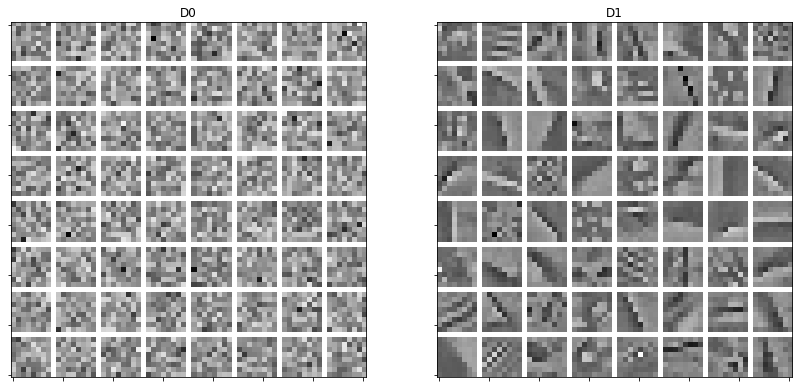

In [7]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value

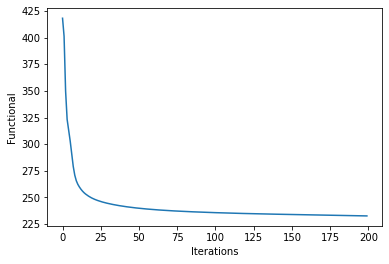

In [8]:
its = d.getitstat()
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional')